In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data_test = pd.read_csv('mnist_test.csv')
data_test = np.array(data_test)

data = pd.read_csv('mnist_train.csv')
data = np.array(data)

m, n = data.shape
mm, nn = data_test.shape
np.random.shuffle(data) # zamýchat data 

data_test =data_test.T
data_train = data.T
data_V = data_train

Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.


print('X_TEST ' +str(X_train.shape))
print('Y_TEST'+str(Y_train.shape))

X_TEST (784, 60000)
Y_TEST(60000,)


In [60]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [73]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

def get_predictions(A2):
    print(A2)
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [62]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 250)

Iteration:  0
[9 6 3 ... 4 9 3] [0 7 2 ... 8 9 7]
0.0989
Iteration:  10
[0 6 3 ... 3 3 3] [0 7 2 ... 8 9 7]
0.1322
Iteration:  20
[0 6 3 ... 3 3 3] [0 7 2 ... 8 9 7]
0.16573333333333334
Iteration:  30
[0 6 3 ... 3 3 3] [0 7 2 ... 8 9 7]
0.21031666666666668
Iteration:  40
[0 6 3 ... 3 3 7] [0 7 2 ... 8 9 7]
0.27066666666666667
Iteration:  50
[0 6 3 ... 3 3 7] [0 7 2 ... 8 9 7]
0.3257833333333333
Iteration:  60
[0 7 3 ... 3 3 7] [0 7 2 ... 8 9 7]
0.3710333333333333
Iteration:  70
[0 7 3 ... 2 3 7] [0 7 2 ... 8 9 7]
0.4083833333333333
Iteration:  80
[0 7 3 ... 2 3 7] [0 7 2 ... 8 9 7]
0.4452
Iteration:  90
[0 7 3 ... 2 3 7] [0 7 2 ... 8 9 7]
0.48025
Iteration:  100
[0 7 3 ... 2 3 7] [0 7 2 ... 8 9 7]
0.5120833333333333
Iteration:  110
[0 7 3 ... 2 3 7] [0 7 2 ... 8 9 7]
0.5399
Iteration:  120
[0 7 3 ... 2 9 7] [0 7 2 ... 8 9 7]
0.5648333333333333
Iteration:  130
[0 7 3 ... 2 9 7] [0 7 2 ... 8 9 7]
0.58805
Iteration:  140
[0 7 3 ... 2 9 7] [0 7 2 ... 8 9 7]
0.6074666666666667
Iteration:  1

In [63]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

[[8.97525651e-01]
 [5.67054291e-08]
 [1.36752758e-03]
 [1.12991078e-03]
 [8.00004472e-04]
 [9.19816452e-02]
 [1.79730753e-04]
 [5.74318838e-06]
 [4.47070340e-03]
 [2.53902647e-03]]
Prediction:  [0]
Label:  0


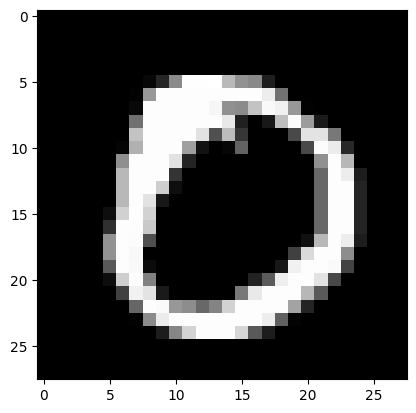

In [74]:


test_prediction(656, W1, b1, W2, b2)



9
9


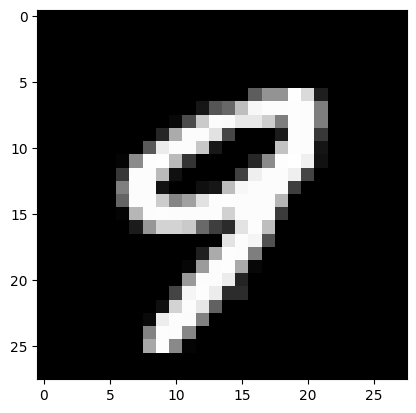

In [ ]:

n= 456
im = X_train[:,n,None]
V = im.reshape((28, 28)) * 255
V.shape

one_hot_Y=(Y_train[n])
print(one_hot_Y)
print(Y_train[n])
plt.gray()
plt.imshow(V, interpolation='nearest')
plt.show()

[[1.]]


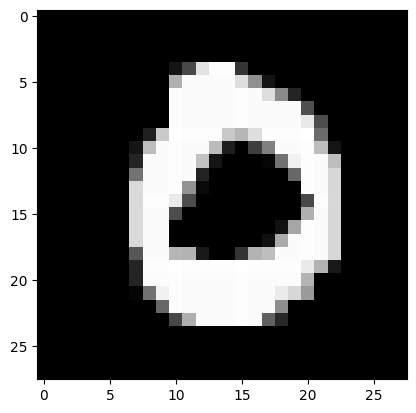

In [ ]:

n= 584
im = X_train[:,n,None]
V = im.reshape((28, 28)) * 255
V.shape

one_hot_Y = one_hot(Y_train[n])
print(one_hot_Y)
plt.gray()
plt.imshow(V, interpolation='nearest')
plt.show()
